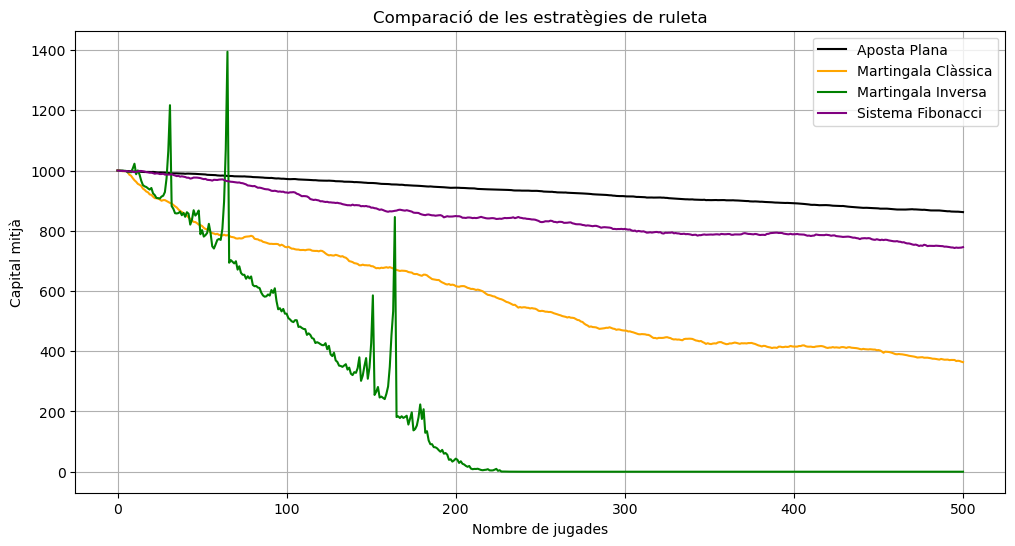

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paràmetres globals
# -------------------------------
B0 = 1000
n = 500
N = 1000
b0 = 10

p_guanyar = 18 / 37
p_perdre = 19 / 37

# -------------------------------
# Funcions per a cada estratègia
# -------------------------------

def aposta_plana():
    trajectories = np.zeros((N, n + 1))
    for sim in range(N):
        B = B0
        trajectories[sim, 0] = B
        for i in range(1, n + 1):
            if B <= 0:
                trajectories[sim, i] = 0
                continue
            Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])
            B = B + b0 * Xi
            trajectories[sim, i] = B
    return np.mean(trajectories, axis=0)

def martingala_classica():
    trajectories = np.zeros((N, n + 1))
    for sim in range(N):
        B = B0
        k = 0
        trajectories[sim, 0] = B
        for i in range(1, n + 1):
            if B <= 0:
                trajectories[sim, i] = 0
                continue
            bi = (2 ** k) * b0
            if bi > B:
                B = 0
                trajectories[sim, i] = 0
                continue
            Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])
            B = B + bi * Xi
            trajectories[sim, i] = B
            k = k + 1 if Xi == -1 else 0
    return np.mean(trajectories, axis=0)

def martingala_inversa():
    trajectories = np.zeros((N, n + 1))
    for sim in range(N):
        B = B0
        k = 0
        trajectories[sim, 0] = B
        for i in range(1, n + 1):
            if B <= 0:
                trajectories[sim, i] = 0
                continue
            bi = (2 ** k) * b0
            if bi > B:
                bi = B  # bet only what we have
            Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])
            B = B + bi * Xi
            trajectories[sim, i] = B
            k = k + 1 if Xi == 1 else 0
    return np.mean(trajectories, axis=0)

def fibonacci_system():
    trajectories = np.zeros((N, n + 1))
    for sim in range(N):
        B = B0
        trajectories[sim, 0] = B
        fib_sequence = [b0, b0]
        k = 0
        for i in range(1, n + 1):
            if B <= 0:
                trajectories[sim, i] = 0
                continue
            bi = fib_sequence[k]
            if bi > B:
                bi = B
            Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])
            B = B + bi * Xi
            trajectories[sim, i] = B
            if Xi == -1:
                k += 1
                if k >= len(fib_sequence):
                    fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
            else:
                k = max(k - 2, 0)
    return np.mean(trajectories, axis=0)

# -------------------------------
# Calcul de les mitjanes
# -------------------------------
capital_plana = aposta_plana()
capital_mart_clas = martingala_classica()
capital_mart_inv = martingala_inversa()
capital_fib = fibonacci_system()

# -------------------------------
# Gràfic comparatiu
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(capital_plana, label="Aposta Plana", color='black')
plt.plot(capital_mart_clas, label="Martingala Clàssica", color='orange')
plt.plot(capital_mart_inv, label="Martingala Inversa", color='green')
plt.plot(capital_fib, label="Sistema Fibonacci", color='purple')

plt.xlabel("Nombre de jugades")
plt.ylabel("Capital mitjà")
plt.title("Comparació de les estratègies de ruleta")
plt.legend()
plt.grid(True)
plt.show()
